복 있는 사람은 악인들의 꾀를 따르지 아니하며 죄인들의 길에 서지 아니하며 오만한 자들의 자리에 앉지 아니하고 오직 여호와의 율법을 즐거워하여 그의 율법을 주야로 묵상하는도다 그는 시냇가에 심은 나무가 철을 따라 열매를 맺으며 그 잎사귀가 마르지 아니함 같으니 그가 하는 모든 일이 다 형통하리로다 악인들은 그렇지 아니함이여 오직 바람에 나는 겨와 같도다 그러므로 악인들은 심판을 견디지 못하며 죄인들이 의인들의 모임에 들지 못하리로다 무릇 의인들의 길은 여호와께서 인정하시나 악인들의 길은 망하리로다 (시1:1-6)

-------

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/joyai/LectureNotes_ML.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

On my honour, I pledge that I have neither received nor provided improper assistance  
in the completion of this assignment.  
Signed: 최윤영 Student Number: 22100748   

<b style="font-size:30px"> Chapter 3: 텐서(Tensor) </b>



기계학습에서 다루는 데이터 유형을 크게 네 가지로 분류할 수 있습니다. 
1. 스칼라(scalar)
1. 벡터(vector)
1. 행렬(matrix)
1. 텐서(tensor)

전통적으로 텐서를 정의해온 수학적 의미와는 약간의 차이가 있지만, 일반적으로 다차원의 넘파이 배열을 텐서라고 부릅니다. 최근의 모든 기계학습과 딥러닝 시스템은 텐서(Tensor)를 기본 데이터 구조로 사용합니다. 구글의 텐서플로(Tensorflow) 이름은 여기서 유래했습니다. 

텐서는 데이터를 저장하는 일종의 Container입니다. 예를 들면, 지금까지 사용해온 행렬(matrix)은 일종의 2D 텐서입니다. 텐서는 임의의 차원 개수를 가지는 행렬을 일반화한 것이라 생각할 수 있습니다. 텐서에서는 차원(Dimension) 대신에 축(axis)라고 부릅니다. 

# 스칼라(Scalar)

스칼라는 하나의 숫자로 구성된 데이터입니다. 모든 데이터의 유형을 텐서로 통칭해서, 스칼라는 0차원 텐서 혹은 0D 텐서라고 부르기도 합니다. 스칼라 텐서의 축 개수는 0입니다. 텐서의 축 개수를 rank라고도 부릅니다. 넘파이에서 ndim 속성으로 확인할 수 있습니다. 

스칼라는 수학적으로 표기할 때 대개 $x$와 같이 소문자로 표기하며 실수(real)이므로 실수의 집합 $\mathbb{R}$의 원소라는 의미에서 다음과 같이 표기합니다. 

$$
x \in \mathbb{R}
$$

In [36]:
import numpy as np

x = np.array(12)   # x - scalar
x.ndim             # x - 축의 개수 0

0

# 벡터(Vector)

벡터는 여러 개의 숫자가 특정한 순서대로 모인 것입니다. 이러한 벡터를 배열 또는 1D 텐서라고 부릅니다. 

예를 들어 붓꽃(iris)의 종을 알아내기 위해 붓꽃의 크기를 측정할 때, 꽃받침의 길이($x_1$)와 폭($x_2$), 꽃잎의 길이($x_3$}와 폭($x_4$}을 측정한다고 하면, 여기서 산출된 4개의 숫자는 한 송이의 붓꽃에서 나온 자료이므로 한 묶고, 그 순서를 유지해주어야 합니다. 이러한 자료의 묶음을 선형 대수에서는 벡터라고 부르고, 기계학습에서는 __특성 벡터(feature vector)__ 라고 부릅니다. 

붓꽃 크기를 묶은 4개의 데이터를 수학적으로 다음과 같이 $\textbf{x}$라고 표기합니다. 

$$
\textbf{x} =
\begin{bmatrix}
       x_{1} \\
       x_{2} \\
       x_{3} \\
       x_{4}
\end{bmatrix}
$$

만약 하나의 벡터를 구성한 숫자의 갯수가 n개이면 n-차원 벡터(n-dimensional vector)라고 하며 다음과 같이 나타냅니다. 

$$
\textbf{x} =
\begin{bmatrix}
       x_{1} \\
       x_{2} \\
       \vdots \\
       x_{n}
\end{bmatrix}
$$


또는 간단히 $\mathbf{x} \in \mathbb{R^n}$이라고 나타낼 수도 있습니다. 

같은 방법으로 위에서 예로 든 붗꽃 벡터는 $\mathbf{x} \in \mathbb{R^4}$ 으로 나타낼 수 있습니다. 

이러한 표기법에서 한가지 유의할 점은 기계학습에서는 대부분의 값들이 벡터나 행렬이므로 볼드체 기호를 사용하지 않을 때가 훨씬 더 많습니다. 또한, 코딩에서도 그렇게 할 수 밖에 없으므로, 상황이나 문맥에 따라 이해하고 읽어낼 수 있어야 합니다. 

## 특성 벡터(Feature vector)

기계학습에서 사용하는 벡터는 흔히 특성 벡터(feature vector)라고 부릅니다. 

예를 들어, 어떤 붓꽃 표본 하나를 측정하였는데, 꽃받침 길이와 폭, 꽃잎의 길이와 폭이 각각 4.8cm, 3.2cm, 1.5cm, 0.5cm였다면, 이 표본은 다음과 같이 표기할 수 있습니다.  

$$ x_1 =
\begin{bmatrix}
       4.8 \\
       3.2 \\
       1.5 \\
       0.5
\end{bmatrix} $$

만약 이와 비슷한 붓꽃이 하나 더 있다면, 그것은 $x_2$라고 하며, 다음과 같이 표시할 수 있을 것입니다. 
$$ x_2 =
\begin{bmatrix}
       5.0 \\
       2.5 \\
       2.5 \\
       1.1
\end{bmatrix} $$

또한, 이러한 표본들이 여러 개 존재하고, 이를 이용하여 여러 붗꽃의 종들중에 하나로 이 표본을 분류할 때, 이러한 표본들의 값들을 특성 벡터라고 합니다.

특히, 여기서 벡터를 볼드체로 표시하지 않고, 단순히 $x_1$이라고 표시했음에도 불구하고, 스칼라가 아니고 벡터임을 이해해야 합니다. 

## 벡터를 넘파이로 다루기

넘파이를 사용하여 벡터를 표현할 때 유의해야 할 것이 몇개 있습니다. 

넘파이에서 벡터는 다음처럼 열(column)의 갯수가 하나인 2차원 배열(array)로 표현합니다. 이때 배열의 차원은 벡터의 차원과 다른 의미입니다. 위에서 설명한 벡터의 차원은 원소 개수를 뜻했는데, 넘파이에서 배열은 원소의 갯수가 몇 개이든 한 줄(row)로 나타낼 수 있다면 1차원 배열(1-dimensional array)이라고 합니다. 

원소를 가로와 세로가 있는 여러 줄의 직사각형 형태로 나타낼 수 있으면 2차원 배열(2-dimensional array)이라고 한다.

예를 들어 위에서 예로 든 벡터 $x_1$을 __넘파이의 2차원 배열__ 로 표기하면 다음과 같습니다.

```
x1 = np.array([[4.8], [3.2], [1.5], [0.5]])
x1

array([[4.8],
       [3.2],
       [1.5],
       [0.5]])
```

In [37]:
# 넘파이 2차원 배열
x1 = np.array([[4.8], [3.2], [1.5], [0.5]])
x1

array([[4.8],
       [3.2],
       [1.5],
       [0.5]])

그러나, 사실상 넘파이는 1차원 배열 객체도 벡터로 인정합니다. 이때는 벡터가 마치 하나의 행처럼 표시되어도 실제로는 열이라는 점에 주의해야 합니다.

```
x1 = np.array([4.8, 3.2, 1.5, 0.5])
x1

array([4.8, 3.2, 1.5, 0.5])
```

In [38]:
# 넘파이 1차원 배열
x1 = np.array([4.8, 3.2, 1.5, 0.5])
x1

array([4.8, 3.2, 1.5, 0.5])

넘파이에서는 1차원 배열도 대부분 벡터로 간주하기도 하는데, 이런 경우에는 벡터가 하나의 row(행)처럼 표시되어도 실제로는 열(col)으로 간주하여 계산이 됩니다. 
그러나, 어떤 넘파이 함수들은 넘파이 2차원 배열 형태의 컬럼 벡터로 입력해야 할 경우도 있는 것에 유의하십시오. 

# 행렬(2 D 텐서)

행렬은 숫자가 채워진 사각 격자형이며, 두 개의 축 즉 행(row)과 열(column)이 있습니다. 이를 2D 텐서라고 볼 수 있습니다. 

예를 들어, 붓꽃 6 송이에 대해 꽃잎과 꽃받침의 크기를 측정하였다면 4차원 붓꽃 데이터가 6개가 있다고 가정합시다. 그러면, 4×6=24개의 실수 숫자가 있다는 것입이다. 이 숫자들을 행렬로 나타내면 다음과 같습니다. 행렬은 보통 $\textbf{X}$와 같이 대문자로 표기합니다.

$$ \textbf{X} = 
\left[
\begin{matrix}
    x_{1,1} & x_{1,2} & x_{1,3} & x_{1, 4} \\
    x_{2,1} & x_{2,2} & x_{2,3} & x_{2, 4} \\
    x_{3,1} & x_{3,2} & x_{3,3} & x_{3, 4} \\
    x_{4,1} & x_{4,2} & x_{4,3} & x_{4, 4} \\
    x_{5,1} & x_{5,2} & x_{5,3} & x_{5, 4} \\
    x_{6,1} & x_{6,2} & x_{6,3} & x_{6, 4} \\
\end{matrix}
\right] $$

이를 미루어 보면, 벡터는 열(column)의 수가 1인 행렬이라고 볼 수 있으므로, 벡터를 열벡터(column vector)라고고도 부릅니다. 

앞에서 예시하였던 두 붓꼿 데이터를 하나의 행렬로 표기하면 다음과 같겠습니다. 

$$ \textbf{X} = 
\left[
\begin{matrix}
    4.8 & 3.2 & 1.5 & 0.5 \\
    5.0 & 2.5 & 2.5 & 1.1 \\
\end{matrix}
\right] $$

넘파이에서 행렬은 다음과 같이 나탸냅니다. 

In [39]:
x = np.array([[4.8, 3.2, 1.5, 0.5], 
              [5.0, 2.5, 2.5, 1.1]])

# 텐서

텐서는 같은 크기의 행렬이 여러 개 같이 묶여 있는 것을 말합니다. 엄격한 수학적 정의로는 텐서는 다차원 배열로 표현되는 사상(mapping)으로 다차원 배열 자체를 뜻하지 않습니다. 하지만 기계학습/인공지능 분야에서는 흔히 다차원 배열을 텐서라고 부르므로 여기에서는 이러한 정의를 따르도록 합니다.

예를 들어 다음 컬러 이미지는 2차원의 행렬처럼 보이지만 사실 빨강, 초록, 파랑의 밝기를 나타내는 3가지의 이미지가 겹친 것입니다. 컬러 이미지에서는 각각의 색을 나타내는 행렬을 채널(channel)이라고 합니다. 예제 이미지는 크기가 768 x 1024이고 3개의 채널이 있으므로 768 x 1024 x 3 크기의 3차원 텐서입니다.

In [40]:
from scipy import misc  

img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양

(768, 1024, 3)

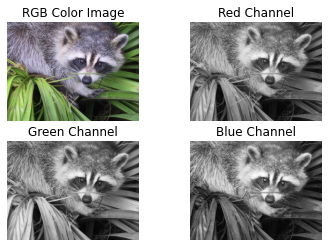

In [41]:
import matplotlib.pyplot as plt
plt.subplot(221) 
plt.imshow(img_rgb, cmap=plt.cm.gray)  
plt.axis("off")
plt.title("RGB Color Image") 

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  
plt.axis("off")
plt.title("Red Channel")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  
plt.axis("off")
plt.title("Green Channel")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  
plt.axis("off")
plt.title("Blue Channel")

plt.show()

3D 텐서들을 하나의 배열로 합치면 4D텐서가 만들어집니다. 기계학습과 딥러닝에서 보통 4D텐서까지 다루고 있으며, 동영상까지 다룰 경우, 5D 텐서까지 확장하기도합니다. 

# 텐서의 핵심 속성

텐서는 3개의 핵심 속성이 있습니다. 

- 축의 개수(Rank): 행렬은 2개의 축(axis)가 있으며, 3D 텐서에는 3개의 축이 있습니다. `ndim` 속성으로 저장되어 있습니다. 
- 크기(shape): 형상이라고도 하며, 각 축을 따라 얼마나 많은 차원이 있는지를 나타냅니다. 파이썬의 투플(tuple)로 표기하고, `shape` 속성으로 저장되어 있습니다. 예를 들면, 앞에 나온 행렬의 크기는 `(3, 5)`이고, 3D 텐서는 각각 `(2, 3, 4)`, `(3, 3, 4)`입니다. 벡터의 크기는 `(5,)`처럼 1개의 원소로 이루어진 투플로 표기합니다. 특히, `(5)`가 아니라 `(5, )`인 것은 쉼표(,)가 있어야 원소가 하나인 투플이란 것을 구별할 수 있기 때문입니다. 스칼라는 ()로 표기하고 크기가 없습니다. 
- 데이터 타입: 넘파이에서는 `dtype`으로 저장됩니다. float32, float64, unit8, int32, char, 등등이 있습니다. 

## Batch Data

일반적으로 기계학습에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터)시작하므로, 0번째 축은 __샘플 축(sample axis)__ 입니다. 그 다음에 나오는 것이 __특성(feature axis)__ 입니다. MNIST에서 `x_train.shape = (60000, 28, 28)`이라면 60000만은 샘플 축이며, 특성 축은 28, 28입니다. 

신경망 모델은 한번에 전체 데이터셋을 처리하지 않습니다. 그 대신 데이터를 작은 배치(batch, 묶음)으로 나눕니다. MNIST 예를 들면, batch 크기를 128로 하면, 첫 번째 배치는 다음과 같습니다. 

`batch = x_train[:128]`

그 다음 배치는 다음과 같습니다. 

`batch = x_train[128:256]`

그리고, n 번째 배치는 다음과 같습니다. 

`batch = x_train[128 * n: 128 * (n + 1)]`

이런 배치 데이터를 다룰 때는 첫 번째 축을 배치 축(batch axis or batch dimension)이라고 부릅니다. 

## Vector Data

가장 일반적으로 많이 쓰이는 벡터 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로, 배치 데이터는 2D 텐서로 인코딩됩니다. 왜냐하면, 첫 번째 축은 샘플 축이 되고, 그 다음에 나오는 벡터가 한 축을 담당하기 때문입니다. 두 번째 나오는 축은 특성 축(feature axis)입니다. 

### Example 1:
예를 들면, 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터입니다. 각 사람은 3개의 값을 가진 벡터로 구성이 됩니다. 만 명에 대한 이런 자료가 있다면, 이 데이터셋은 (10000, 3) 크기의 텐서에 저장할 수 있습니다. 

데이터에서 시간이 중요한 경우, 시간이 또한 포함하여 3D 텐서로 저장됩니다. 

### Example 2:
예를 들어, 분 단위로 현재 주식 가격, 지난 일분간의 최고 가격, 최저 가격을 저장한다고 하면, 이것은 3D벡터로 인코딩 됩니다. 하루에 390분(오전 9:00 ~ 오후3:30)동안 거래하므로, 하루 데이터는 (390, 3)크기의 2D텐서에 인코딩할 수 있습니다. 250일간 거래 데이터셋이라고 하면, 이는 (250, 390, 3)크기의 3D텐서에 저장할 수 있습니다. 여기서 1일치 데이터가 하나의 샘플이 됩니다. 

### Example 3:
트윗 데이터셋: 각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스입니다. 여기에서는 각 문자가 128개의 크기인 이진 벡터로 인코딩될 수 있습니다(해당 문자의 인덱스만 1이고 나머지는 모두 0인 벡터). 그러면 각 트윗은 (280, 128) 크기의 2D 텐서로 인코딩될 수 있습니다. 100만 개의 트윗으로 구성된 데이터셋은 (1000000, 280, 128) 크기의 텐서에 저장됩니다.

## Image Data 
이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어집니다. 다만, MNIST 데이터셋처럼 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D텐서로 저장할 수 있습니다. 흑백이미지의 경우, 컬러 채널의 차원 크기는 1입니다. 일반적으로 이미지 텐서는 3D로 저장합니다. 

예를 들면, 256x256 흑백이미지에 대한 128개 배치 데이터는 (128, 256, 256, 1)크기의 텐서에 저장할 수 있습니다. 컬러 이미지라면, (28, 256, 256, 3) 크기의 텐서에 저장합니다. 이렇게 (samples, height, width, color_depth) 형식과 다르게 Theano같은 라이브러리에서는 (samples, color_depth, height, width)형식으로 데이터를 다룹니다. Keras는 keras.jason에 설정을 통해서 두 형식을 모두 지원합니다.

# 텐서의 활용 예제 - MNIST 

기계학습/딥러닝의 "Hello World"에 해당하는 MNIST 예제에서 사용하는 데이터셋을 불러서 텐서에 대해 알아봅니다. 

학습 과정에 사용할 train 자료의 개수는 60000개 이고, 테스트 자료의 개수는 10000개입니다. 각 자료(sample)의 x는 가로x세로가 각각 28x28 픽셀로 구성된 grayscale 이미지이며, y는 각 이미지의 실제 값(label)을 가지고 있습니다. 다음 그림은 데이터의 상태를 잘 보여주고 있습니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/MNISTdataset2.png?raw=true" width="500">
<center>그림 1: MNIST 데이터셋의 x_train 훈련 자료 형상</center>

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()

## 데이터셋 속성 알아보기

### 차원
Training과 test 데이터셋의 ndim 차원 속성을 알아봅니다. 


In [2]:
print(x_train.ndim, y_train.ndim)
print(x_test.ndim, y_test.ndim)

3 1
3 1


### 크기/형상

Training과 test데이터셋의 크기(shape, 형상)를 알아봅니다. 

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 타입

Training과 test데이터셋의 데이터 타입은 dtype으로 찾아볼 수 있습니다. 

In [4]:
print(x_train.dtype, y_train.dtype)

uint8 uint8


여기서 사용하는 배열은 정수형 3D 텐서입니다. 좀 더 정확하게는 28x28 크기의 정수 행렬 6만개가 학습을 위한 것이며, 1만개가 테스트를 위한 것입니다. 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255사이의 값입니다. 

## 데이터셋에서 하나의 이미지 추출하기

x_train에 저장되어 있는 6만개 샘플의 처음과 마지막 샘플을 조사(슬라이싱, 출력, 시각화 등등)해보려면 어떻게 하면 될까요?

x_train으로부터 처음 이미지와 마지막 이미지를 복사해오기 즉 slicing해서 각각 `a_image, z_image`에 저장하기로 합니다. 그리고, 그대로 출력을 시도합니다. 

In [5]:
a_image, z_image = x_train[0], x_train[-1]
print('shape:', a_image.shape,'dim:', a_image.ndim, 'type:', a_image.dtype)

shape: (28, 28) dim: 2 type: uint8


Before working on `a_image` and `z_image`, check labels of two images using `y_train`,

In [6]:
a_label, z_label = y_train[0], y_train[-1]
print(a_label, z_label)

5 8


## 이미지 데이터 출력하기(1)

`print()` 함수를 사용하여 출력하면, 파이썬에서 자동적으로 줄바꿈을 함으로 아래와 같이 그 내용을 한 눈으로 알아보기 쉽지 않습니다.  다른 방법을 찾아보는 것이 좋습니다. (주피터랩/노트북의 너비를 충분히 넓혀주어도 줄바꿈이 나타나는 것에 유의하십시오.)

In [7]:
print(a_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 이미지 데이터 출력하기(2)

이미지의 픽셀 값들을 28 x 28 행렬로 출력하기 즉 각 row(행)을 한 줄로 출력해보면 다음과 같습니다 (줄바꿈이 나타나지 않도록 주피터랩/노트북의 너비를 충분히 넓혀주어야 합니다.)

__Expected Output:__
```
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212  27   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 254 225 218 218 237 248  40   0  21 164 187   0   0 
  0   0   0   0   0   0   0   0   0   0   0  89 219 254  97  67  14   0   0  92 231 122  23 203 236  59   0   0 
  0   0   0   0   0   0   0   0   0   0  25 217 242  92   4   0   0   0   0   4 147 253 240 232  92   0   0   0 
  0   0   0   0   0   0   0   0   0   0 101 255  92   0   0   0   0   0   0 105 254 254 177  11   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 167 244  41   0   0   0   7  76 199 238 239  94  10   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 192 121   0   0   2  63 180 254 233 126   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 190 196  14   2  97 254 252 146  52   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 130 225  71 180 232 181  60   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0 130 254 254 230  46   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   6  77 244 254 162   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 110 254 218 254 116   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 131 254 154  28 213  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  66 209 153  19  19 233  60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0 142 254 165   0  14 216 167   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  90 254 175   0  18 229  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  26 229 249 176 222 244  44   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0  73 193 197 134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
```

그러면, 우리가 여기서 출력한 첫 데이타는 28 x 28 배열의 2D 텐서인 것을 알고 있습니다. 2D 텐서를 출력할 때, 디폴트 print를 사용하지 말고, 한 줄에 한 row씩, 28 x 28 형식으로 출력하도록 다음과 같이 코딩을 해봅니다. 

In [8]:
for row in z_image:                    # row 
    for pix in row:                    # each element in a row
        print('%3d' % pix, end = ' ')  # print('{0:3d}'.format(pix), end=' '), print('%3d' % pix, end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212  27   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 254 225 218 218 237 248  40   0  21 

각 숫자는 이미지 픽셀이며, 각 픽셀은 0~255사이의 값이며, 각 픽셀의 밝기 정도를 나타냅니다. 가장 작은 수 0이면 가장 어두운 검은색이며, 255는 가장 밝은 색, 흰색을 나타냅니다. 

## 이미지 데이터 출력하기(3)

이미지의 픽셀의 한 줄을 자동적으로 줄바꿈(wrap)하지 않고 계속해서 출력하는 넘파이 프린트 옵션(`set_printoptions`)중에서 `linewidth`을 사용할 수 있는 방법도 있습니다. 우리가 사용할 linewidth는 가능한 충분히 주기 위하여, 넘파이의 무한대를 뜻하는 `np.inf`를 사용하는 것도 한 방법입니다. (줄바꿈이 나타나지 않도록 주피터랩/노트북의 너비를 충분히 넓혀주어야 합니다.)

__Expected Output:__
```
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 254 225 218 218 237 248  40   0  21 164 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 219 254  97  67  14   0   0  92 231 122  23 203 236  59   0   0]
 [  0   0   0   0   0   0   0   0   0   0  25 217 242  92   4   0   0   0   0   4 147 253 240 232  92   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 101 255  92   0   0   0   0   0   0 105 254 254 177  11   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 167 244  41   0   0   0   7  76 199 238 239  94  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 192 121   0   0   2  63 180 254 233 126   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 190 196  14   2  97 254 252 146  52   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 130 225  71 180 232 181  60   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 130 254 254 230  46   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6  77 244 254 162   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 110 254 218 254 116   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 131 254 154  28 213  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  66 209 153  19  19 233  60   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 142 254 165   0  14 216 167   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  90 254 175   0  18 229  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  26 229 249 176 222 244  44   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  73 193 197 134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
 ```

In [9]:
import numpy as np
help(np.set_printoptions)

Help on function set_printoptions in module numpy:

set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, suppress=None, nanstr=None, infstr=None, formatter=None, sign=None, floatmode=None, *, legacy=None)
    Set printing options.
    
    These options determine the way floating point numbers, arrays and
    other NumPy objects are displayed.
    
    Parameters
    ----------
    precision : int or None, optional
        Number of digits of precision for floating point output (default 8).
        May be None if `floatmode` is not `fixed`, to print as many digits as
        necessary to uniquely specify the value.
    threshold : int, optional
        Total number of array elements which trigger summarization
        rather than full repr (default 1000).
        To always use the full repr without summarization, pass `sys.maxsize`.
    edgeitems : int, optional
        Number of array items in summary at beginning and end of
        each dimension (default 

In [10]:
np.set_printoptions(linewidth=np.inf)
print(z_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 254 225 218 218 23

## 이미지로 시각화하기 

이제, 픽셀 값들을 28 x 28 이미지로 시각화 하는 방법이 훨씬 더 좋지 않을까요? 

다행히도, 이러한 단순한 배열을 실제 이미지로 시각화할 수 있는 파이썬 표준 라이브러리인 맷플롯립(matplotlib)이 있습니다. 이 라이브러리을 import하고, imshow() 함수를 이용하여 시각화할 수 있습니다. 모든 이미지가 x_train에 저장되어 있으므로, 그 중에 첫 번째 이미지는 `x_train[0]`에, 마지막 이미지는 `x_train[-1]`로 슬라이싱(추출)하여 하나의 이미지를 다루거나 시각화할 수 있습니다. 

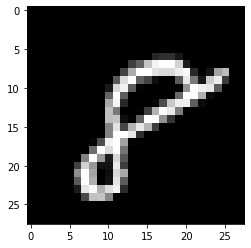

In [11]:
import matplotlib.pyplot as plt

plt.imshow(z_image, cmap='gray')    # use 'Greys' or cmap=plot.cm.binary for inverted grayscale image
plt.show()

## 여러 장의 이미지를 시각화 하기

첫 한장이 아니라 첫 10장을 시각화하려면 어떻게 할까요?  다음과 같이 처음 10장의 이미지를 slicing할 수 있습니다. 여기서 콜론은 range를 특정할 때 사용합니다. `start:end`형식입니다. 단, start 부분이 생략되어 있으면, 처음부터이고, end 부분이 생략되어 있으면, 끝까지를 의미합니다. 둘 다 생략이 되어 콜론만 남아 있으면, 처음부터 끝까지 모두를 의미합니다. 

In [12]:
images = x_train[:10]
labels = y_train[:10]
print(images.shape)

(10, 28, 28)


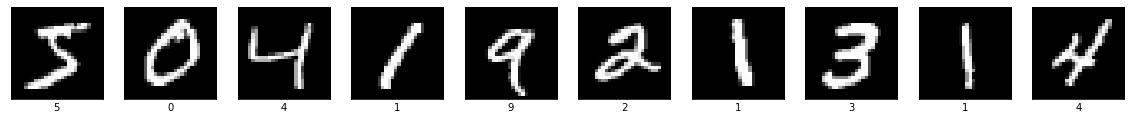

In [13]:
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(10, 10, i + 1)     # displays upto 100 images
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    plt.xlabel(labels[i])
plt.show()

# 넘파이로 텐서 다루기 - MNIST 이미지 추출하기

기계학습과 딥러닝에서 많이 사용하는 넘파이 배열에 대한 Slicing연산을 다루어 봅니다. 

## Example 1. 

다음 예는 11째부터 90개의 이미지들, 즉 11번째부터 100번째 이미지까지 추출하고자 합니다. 다른 프로그래밍 언어와 마찬가지로, 넘파이에서 인덱싱은 언제든지 0부터 시작합니다. 그러므로, 11번째 이미지는 `x_train[10]`에 저장되어 있고, 100번째 이미지는 `x_train[99]`에 저장되어 있습니다. 

그러나, 주의할 것은 그리고, 슬라이싱의 범위를 명시할 때 시작 start(시작) 인덱스는 항상 포함하고, 끝나는 end(마지막) 인덱스는 __포함하지 않습니다__.  그러므로 end index는 100으로 지정해야 99까지 slicing을 하게 됩니다. 

In [14]:
print(x_train.shape)
my_slice = x_train[10:100]
print('shape:', my_slice.shape)
print('len:', len(my_slice))

(60000, 28, 28)
shape: (90, 28, 28)
len: 90


## Example 2. 

그러면, 6만장의 이미지 데이터셋 x_train(60000, 28, 28)의 upper-left corner를 모두 추출하여 (60000, 14, 14)의 크기를 얻기 위한 Slicing을 하십시오.  

```
(60000, 14, 14)
```

In [15]:
my_slice = x_train[:,:14,:14]
print(my_slice.shape)

(60000, 14, 14)


위와 같은 경우, 각 이미지의 x 방향으로 `0 ~ 13` 픽셀까지, y 방향으로 `0 ~ 13` 픽셀까지 slicing됩니다. 즉 이미지의 왼쪽 위 코너부분 1/4 크기로 slicing이 이루어질 것입니다. 

각 이미지의 오른쪽 아래 코너 부분을 slicing하려면, `x_train[:, 14:, 14:]`로 설정하면, x, y방향으로 15번째 픽셀부터 끝까지(28번째) 추출될 것입니다. 

# Exercises

## MNIST 데이터 추출과 시각화하기

다음의 각 항목을 주피터북/노트북의 각각의 셀에서 완성하고 실행하십시오. 
MNIST 데이터셋 `x_train`의 마지막 10개의 이미지와 레이블을 slicing(추출)하여 `zap`라고 설정하고, 시각화합니다. 

__Expected Output:__

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/zap.png?raw=true" width="800"></center>
<center>그림 1: MINST 데이터셋 이미지 추출하기와 시각화</center>

__Solution:__

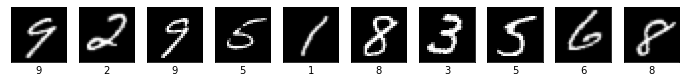

In [16]:
import matplotlib.pyplot as plt

zap = x_train[-10:]
label = y_train[-10:]
    
plt.figure(figsize=(12,12))
for i in range(len(zap)):
    plt.subplot(10, 10, i + 1)    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(zap[i], cmap="gray")
    plt.xlabel(label[i])
    
plt.show()


## 이미지의 일부분 추출하기

위의 문제에서 `x_train`이 아니라 `zap`으로부터 각 이미지의 가운데 부분(14 x 14)을 추출하여 `zip`라고 설정하고, 이미지와 레이블을 시각화합니다. 

__Expected Output:__

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/zip.png?raw=true" width="800"></center>
<center>그림 2: MNIST 데이터셋 이미지의 일부분 추출하기</center>

__Solution:__

(10, 14, 14)


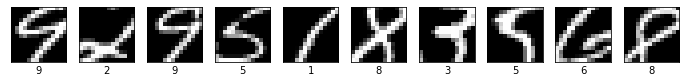

In [17]:
zip = x_train[-10:,7:-7,7:-7]

print(zip.shape)
plt.figure(figsize=(12,12))
for i in range(len(zip)):
    plt.subplot(10, 10, i + 1)     # displays upto 100 images
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(zip[i], cmap="gray")
    plt.xlabel(label[i])
    
plt.show()

## MNIST 데이터 무작위로 추출하기 
MNIST 데이터셋의 첫부분에 있는 10개의 이미지를 순서없이 무작위로 추출하여 시각화하십시오. 아래의 예시는 여러분의 결과와 그 순서가 다를 수 있습니다

__Expected Output:__

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/zigzag.png?raw=true" width="800"></center>
<center>그림 3: MNIST 첫 이미지 열개를 무작위로 추출하기</center>

__힌트:__

- 0부터 9까지의 숫자를 무작위로 섞어서 리스트로 만든 후, 슬라이싱(추출)할 때 사용하는 방법을 넘파이의 팬시인덱싱(Fancy indexing)이라고 합니다. 
- `np.arange(), np.random.shuffle()` 같은 함수가 유용할 것입니다. 

MNIST indices: [2 6 1 8 4 7 9 0 3 5]


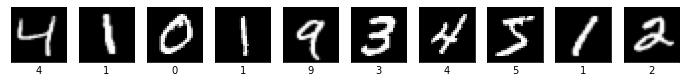

In [20]:
indices = np.arange(10)
np.random.shuffle(indices)
print(f'MNIST indices: {indices}')

x10 = x_train[indices]
y10 = y_train[indices]

plt.figure(figsize=(12,12))
for i in range(len(x10)):
    plt.subplot(10, 10, i + 1)     # displays upto 100 images
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x10[i], cmap="gray")
    plt.xlabel(y10[i])
plt.show()

## 이미지의 벡터화와 시각화 

딥러닝이 아닌 인공신경망의 경우 예측 문제의 입력 데이터는 대부분 벡터로 표시합니다. 

예를 들어 숫자 이미지를 입력받아 어떤 숫자인지 분류하는 문제를 다룰 때, 이미지는 원래 2차원 데이터이지만 인공신경망의 기계학습에서는 1차원 벡터로 변환하여 사용합니다. 다음은 사이킷런 패키지에서 제공하는 MNIST 숫자 이미지 데이터셋입니다. 이 데이터는 0부터 9까지의 숫자를 손으로 쓴 후에 `8x8`의 낮은 해상도 이미지로 스캔한 것입니다. 

다음 코드는 MNIST 숫자들로 구성된 이미지들 중에서 처음에 있는 숫자 0과 9의 이미지 8개를 출력한 코드입니다. 

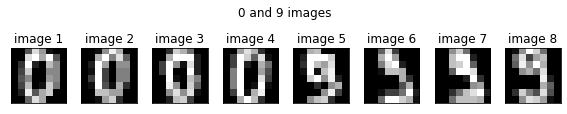

In [21]:
from sklearn.datasets import load_digits  

digits = load_digits()  # returns Bunch objects, not numpy
# selected four 0's and four 9's indices in 'digits'
indices = [0, 10, 20, 30, 9, 19, 29, 39]  

d = []
for i in range(8):
    d.append(digits.images[indices[i]])
    
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap='gray')
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))

plt.suptitle("0 and 9 images")
plt.tight_layout()
plt.show()

### 문제 1: 데이터셋 분석하기 

1. `digits`과 `digits.images`의 객체 타입을 각각 출력하십시오. 
1. `digits.images`의 형상(크기)를 출력하십시오. 

__Expected Output:__
```
type: <class 'sklearn.utils.Bunch'>
type: <class 'numpy.ndarray'>
shape: (1797, 8, 8)
```

In [27]:
from sklearn.datasets import load_digits  

digits = load_digits()  # returns Bunch objects, not numpy
print(f'type: {type(digits)}')
print(f'type: {type(digits.images)}')
print(f'shape: {digits.images.shape}')

type: <class 'sklearn.utils.Bunch'>
type: <class 'numpy.ndarray'>
shape: (1797, 8, 8)


### 이미지 추출하기 

아래 code snippet은 위의 예시에서 사용한 코드의 일부분입니다. 데이터셋의 이미지에서 (`digits.images`) 여덟 개의 이미지 인덱스를 사용하여 이미지를 하나씩 추출하여 리스트 `d`에 저장하는 과정입니다. 

```
d = []
for i in range(8):
    d.append(digits.images[indices[i]])
```
이러한 code snippet을 fancy indexing을 사용하여, for loop없이 한 줄의 코드로 이미지들을 추출하십시오.  

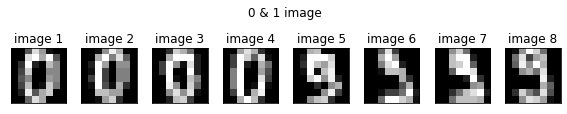

In [29]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # returns Bunch objects, not numpy
# selected four 0's and four 9's indices in 'digits'
indices = [0, 10, 20, 30, 9, 19, 29, 39]  

############## recode the following ###########
d=digits.images[indices]
###############################################


plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap='gray')
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title(f"image {i + 1}")
plt.suptitle("0 & 1 image")
plt.tight_layout()
plt.show()

### 이미지(8x8)를 벡터(64x1)로 변환하고 시각화하기

위에서 시각화한 이미지들을 다음과 같이 1차원 벡터(64x1)로 변환하여 시각화 하는 코드를 완성하십시오.   

__Expected Output:__

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/vectorized.png?raw=true" width="800">
그림 4: 이미지(8x8) 배열을 벡터(64x1)로 변환하여 시각화하기

__관찰:__   
벡터로 변환된 같은 이미지들의 패턴이 비슷한 것을 어느 정도 관찰할 수 있습니다. 이 비슷한 특성을 서로 비교함으로 숫자들을 분류하도록 만드는 것이 인공신경망을 사용하는 기계학습입니다.__

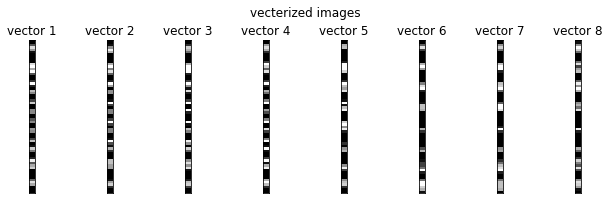

In [34]:
from sklearn.datasets import load_digits  

digits = load_digits()  # returns Bunch objects, not numpy
# selected four 0's and four 9's indices in 'digits'
indices = [0, 10, 20, 30, 9, 19, 29, 39]  

v=digits.images[indices]
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i].reshape(64,1), aspect=0.4, interpolation='nearest', cmap='gray') 
    # use one of two line depending on the code above:
    # plt.imshow(v[i].reshape(64,1), aspect=0.4, interpolation='nearest', cmap='gray') 
    # plt.imshow(v[i], aspect=0.4, interpolation='nearest', cmap='gray')
    
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title(f"vector {i + 1}")
plt.suptitle("vecterized images")
plt.tight_layout(w_pad=7)
plt.show()

# FYI: For Your Information
다음은 MNIST데이터셋의 처음 95개의 이미지를 시각화하는 코드입니다. 

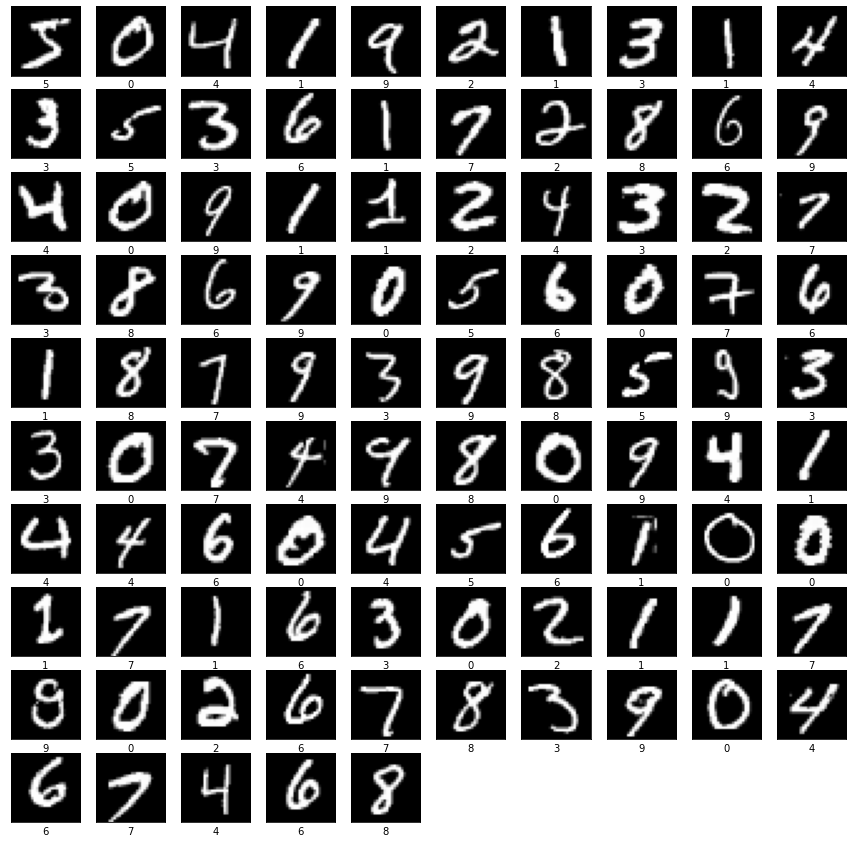

In [35]:
import numpy as np
import matplotlib.pyplot as plt

images = x_train[:95]
labels = y_train[:95]
plt.figure(figsize=(15,15))
for i in range(len(images)):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    plt.xlabel(labels[i])

-------
__Be joyful always!__ 1 Thes.5:16